# <strong><font color="3f51b5">📌 Extracción</font></strong>

## <strong><font color="7b83eb">Importación de librerías</font></strong>

In [23]:
import pandas as pd
import numpy as np
import json
import ast
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

from pandas import json_normalize
from IPython.display import display, HTML

warnings.filterwarnings('ignore')

## <strong><font color="7b83eb">Carga de datos desde el archivo JSON</font></strong>

In [2]:
url_data = 'https://raw.githubusercontent.com/PamelaOrmeno/Challenge_Telecom/main/Data/TelecomX_Data.json'
df = pd.read_json(url_data)

## <strong><font color="7b83eb">Diccionario de datos</font></strong>

`Customer`
>- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa `(Yes / No)`
- `gender`: género (masculino `(Male)`y femenino `(Female)`)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años `(0 / 1)`
- `Partner`: si el cliente tiene o no una pareja `(Yes / No)`
- `Dependents`: si el cliente tiene o no dependientes (Yes / No)
- `tenure`: meses de contrato del cliente

`Phone`
>- `PhoneService`: suscripción al servicio telefónico `(Yes / No)`
- `MultipleLines`: suscripción a más de una línea telefónica `(Yes / No/ No Phone service)`

`Internet`
>- `InternetService`: suscripción a un proveedor de internet `(DSL / Fiber optic / No)`
- `OnlineSecurity`: suscripción adicional de seguridad en línea `(Yes / No / No internet service)`
- `OnlineBackup`: suscripción adicional de respaldo en línea `(Yes / No / No internet service)`
- `DeviceProtection`: suscripción adicional de protección del dispositivo `(Yes / No / No internet service)`
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera  `(Yes / No / No internet service)`
- `StreamingTV`: suscripción de televisión por cable  `(Yes / No / No internet service)`
- `StreamingMovies`: suscripción de streaming de películas  `(Yes / No / No internet service)`

`Account`
>- `Contract`: tipo de contrato  `(Month-to-month / One year / Two year)`
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea `(Yes / No)`
- `PaymentMethod`: forma de pago (`(Banck transfer(automatic) / Credit card (automatic) / Electronic check / Mailed Check)`
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

## <strong><font color="7b83eb">Exploración inicial + validación del esquema</font></strong>

### <strong><font color="2e2e2e">Info DataFrame</font></strong>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


### <strong><font color="2e2e2e">Dtypes DataFrame</font></strong>

In [4]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


### <strong><font color="2e2e2e">Head DataFrame</font></strong>

In [5]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# <strong><font color="3f51b5">📌 Transformación</font></strong>



### <strong><font color="2e2e2e">Info DataFrame</font></strong>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


### <strong><font color="2e2e2e">Desanidar columnas</font></strong>

In [7]:
if 'customer' in df.columns:
    df_customer = pd.json_normalize(df['customer'])
    df_phone = pd.json_normalize(df['phone'])
    df_internet = pd.json_normalize(df['internet'])
    df_account = pd.json_normalize(df['account'])

    df_flat = pd.concat([
        df[['customerID', 'Churn']],
        df_customer,
        df_phone,
        df_internet,
        df_account
    ], axis=1)

    df = df_flat.copy()
    print("✅ Datos desanidados correctamente.")
else:
    print("🔁 Los datos ya están desanidados. No se vuelve a ejecutar.")

✅ Datos desanidados correctamente.


### <strong><font color="2e2e2e">Normalizar nombres de columnas (minúsculas)</font></strong>

In [8]:
df.columns = df.columns.str.strip().str.lower()

### **Transformación de valores**

#### <strong><font color="2e2e2e">Mapeo de valores para la columna 'gender'</font></strong>

In [9]:
df['gender'] = df['gender'].map({'Female': 'Femenino', 'Male': 'Masculino'})

#### <strong><font color="2e2e2e">Convertir columnas "yes"/"no" a 1 y 0 de forma segura</font></strong>

In [10]:
columnas_binarias = ['churn', # 0 - Customer
                     'partner', #1 - Customer
                     'dependents', #2 - Customer
                     'phoneservice', #3 - Phone
                     'multiplelines' , #4 - Phone
                      'onlinesecurity' , #5 - Internet
                     'onlinebackup', #6 - Internet
                     'deviceprotection', #7 - Internet
                      'techsupport', #8 - Internet
                     'streamingtv' , #9 - Internet
                     'streamingmovies' , #10 - Internet
                      'paperlessbilling' #11 - Account
                    ]

for col in columnas_binarias:
    if col in df.columns:
      df[col] = df[col].astype(str).str.strip().str.lower().apply(lambda x: 1 if x == 'yes' else 0)
      #df[col] = df[col].astype(str).str.strip().str.lower().replace({'yes': 1, 'no': 0})
    else:
        print(f"⚠️ Columna no encontrada: {col}")

####**Mapeo de data**

In [11]:
df['contract'] = df['contract'].map({
    'Month-to-month': 'Mes a Mes',
    'Two year': 'Dos Años',
    'One year': 'Un Año'
})


df['paymentmethod'] = df['paymentmethod'].map({
    'Mailed check': 'Cheque enviado por correo',
    'Electronic check': 'Cheque electrónico',
    'Credit card (automatic)': 'Tarjeta de crédito',
    'Bank transfer (automatic)': 'Transferencia bancaria'
})

df['internetservice'] = df['internetservice'].map({
    'DSL': 'DSL',
    'Fiber optic': 'Fibra Óptica',
    'No': 'Ninguno'
})

In [12]:
df.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,...,1,0,1,1,0,Un Año,1,Cheque enviado por correo,65.6,593.3
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Mes a Mes,0,Cheque enviado por correo,59.9,542.4
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra Óptica,...,0,1,0,0,0,Mes a Mes,1,Cheque electrónico,73.9,280.85
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra Óptica,...,1,1,0,1,1,Mes a Mes,1,Cheque electrónico,98.0,1237.85
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fibra Óptica,...,0,0,1,1,0,Mes a Mes,1,Cheque enviado por correo,83.9,267.4


In [13]:
df.to_csv('Data_Tranformada.csv', index=False)

#### <strong><font color="2e2e2e">Convertir columnas numéricas</font></strong>

In [14]:
df['charges.monthly'] = pd.to_numeric(df['charges.monthly'], errors='coerce')
df['charges.total'] = pd.to_numeric(df['charges.total'], errors='coerce')

#### <strong><font color="2e2e2e">Eliminar registros con valores nulos en charges.total</font></strong>

In [15]:
nulos = df['charges.total'].isnull().sum()
if nulos > 0:
    print(f"🧹 Se eliminaron {nulos} registros con 'charges.total' nulo.")
    df = df[df['charges.total'].notnull()]

🧹 Se eliminaron 11 registros con 'charges.total' nulo.


#### <strong><font color="2e2e2e">Crear columna de gasto diario estimado</font></strong>

In [16]:
df['cuentas_diarias'] = df['charges.total'] / 30

### <strong><font color="2e2e2e">Verificar resultados</font></strong>

In [17]:
print("\n📊 Verificación final:")
print(df.info())
print(df.head())



📊 Verificación final:
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7256 non-null   object 
 1   churn             7256 non-null   int64  
 2   gender            7256 non-null   object 
 3   seniorcitizen     7256 non-null   int64  
 4   partner           7256 non-null   int64  
 5   dependents        7256 non-null   int64  
 6   tenure            7256 non-null   int64  
 7   phoneservice      7256 non-null   int64  
 8   multiplelines     7256 non-null   int64  
 9   internetservice   7256 non-null   object 
 10  onlinesecurity    7256 non-null   int64  
 11  onlinebackup      7256 non-null   int64  
 12  deviceprotection  7256 non-null   int64  
 13  techsupport       7256 non-null   int64  
 14  streamingtv       7256 non-null   int64  
 15  streamingmovies   7256 non-null   int64  
 16  contract          7256 n

# <strong><font color="3f51b5">📊 Carga y análisis</font></strong>

### <strong><font color="2e2e2e">Estilo visual</font></strong>

In [18]:
plt.style.use('seaborn-v0_8-muted')
sns.set_palette('muted')
%matplotlib inline

### <strong><font color="2e2e2e">Resumen estadístico de variables numéricas</font></strong>

In [19]:
print("🔍 Resumen estadístico de variables numéricas:")
display(df.describe())

🔍 Resumen estadístico de variables numéricas:


,churn,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,charges.monthly,charges.total,cuentas_diarias
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.257580,0.1629,0.483600,0.299063,32.395535,0.902839,0.421858,0.285832,0.344542,0.342751,0.289416,0.383958,0.387955,0.593716,64.755423,2280.634213,76.021140
std,0.437332,0.3693,0.499765,0.457879,24.558067,0.296197,0.493890,0.451841,0.475252,0.474662,0.453522,0.486381,0.487318,0.491173,30.125739,2268.632997,75.621100
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.626667
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.450000,400.225000,13.340833
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,46.366667
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.900000,3785.300000,126.176667
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,289.493333


### <strong><font color="2e2e2e">Distribución de churn</font></strong>

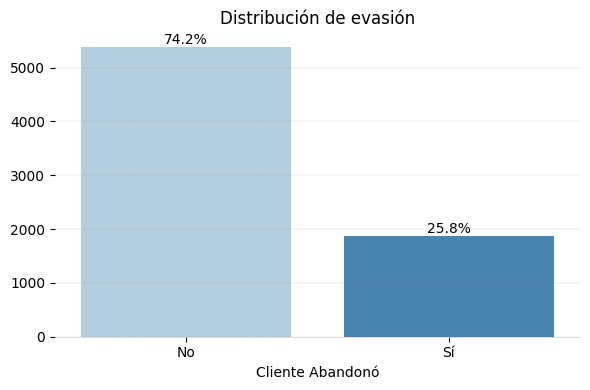

In [24]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='churn', palette='Blues')

# Agregar porcentajes
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Quitar bordes
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# Opcionales: ajustar estilo
ax.spines['bottom'].set_color('#ccc')
ax.spines['bottom'].set_linewidth(0.5)
ax.grid(axis='y', linestyle='--', linewidth=0.3, color='gray', alpha=0.5)

plt.title('Distribución de evasión')
plt.xticks([0, 1], ['No', 'Sí'])
plt.xlabel('Cliente Abandonó')
plt.ylabel('')
plt.tight_layout()
plt.show()


### <strong><font color="2e2e2e">Recuento de evasión por variables categóricas</font></strong>

In [21]:
def graficar_churn_categoricas(df):
    # Títulos descriptivos
    categorias = {
        'contract': 'Evasión según tipo de contrato',
        'paymentmethod': 'Evasión según método de pago',
        'internetservice': 'Evasión según tipo de servicio de Internet',
        'phoneservice': 'Evasión según servicio telefónico',
        'dependents': 'Evasión según presencia de dependientes'
    }

    # Etiquetas para ejes
    etiquetas = {
        'contract': 'Tipo de contrato',
        'paymentmethod': 'Método de pago',
        'internetservice': 'Tipo de Internet',
        'phoneservice': 'Tiene servicio telefónico',
        'dependents': 'Tiene personas a su cargo'
    }

    # Orden ya en español, según transformaciones previas
    ordenes_personalizados = {
        'contract': ['Mes a Mes', 'Un Año', 'Dos Años'],
        'paymentmethod': [
            'Cheque enviado por correo',
            'Cheque electrónico',
            'Tarjeta de crédito',
            'Transferencia bancaria'
        ],
        'internetservice': ['Ninguno', 'DSL', 'Fibra Óptica'],
        'phoneservice': [0, 1],
        'dependents': [0, 1]
    }

    rotaciones = {
        'paymentmethod': 30,
        'contract': 0,
        'internetservice': 0,
        'phoneservice': 0,
        'dependents': 0
    }

    tamanos = {
        'paymentmethod': (10, 4),
        'phoneservice': (6, 4),
        'dependents': (6, 4)
    }

    y_max = 5000
    y_step = 1000

    for col, titulo in categorias.items():
        plt.figure(figsize=tamanos.get(col, (8, 4)))
        orden = ordenes_personalizados.get(col)
        ax = sns.countplot(data=df, x=col, hue='churn', order=orden, palette='pastel')

        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)

        plt.title(titulo, pad=20)  # Puedes ajustar 20 a lo que visualmente convenga
        plt.xlabel(etiquetas[col])
        plt.ylabel('Cantidad de clientes')
        plt.ylim(0, y_max)
        plt.yticks(np.arange(0, y_max + 1, y_step))
        plt.legend(
            title='¿Cliente se dio de baja?',
            labels=['No', 'Sí'],
            loc='upper left',
                bbox_to_anchor=(1.01, 1),
            borderaxespad=0
            )

        if col in ['phoneservice', 'dependents']:
            ax.set_xticklabels(['No', 'Sí'])

        plt.xticks(rotation=rotaciones[col])
        plt.tight_layout()
        # Guardar gráfico

        carpeta = '/content/graficos_categoricos'
        nombre_archivo = os.path.join(carpeta, f"{col}_evasión.png")
        plt.tight_layout()
        plt.savefig(nombre_archivo, dpi=300, bbox_inches='tight')

        # Guardar gráfico

        plt.show()
        display(HTML("<hr style='border-top: 1px solid #bbb; margin: 30px 0;'>"))


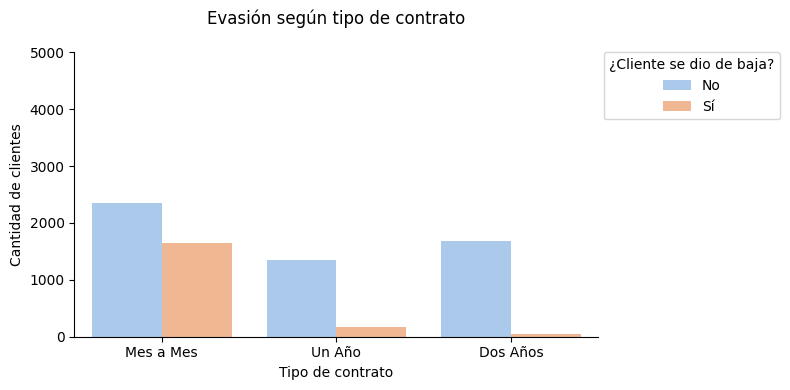

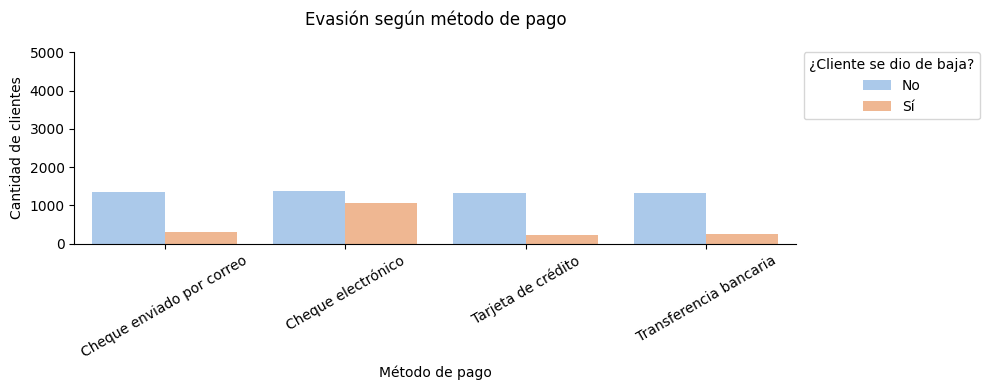

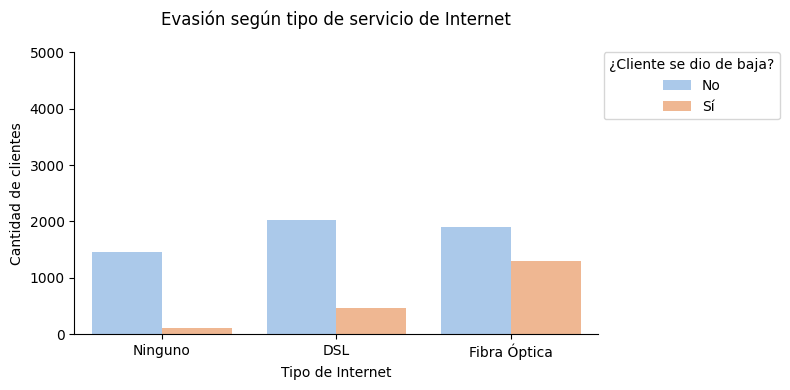

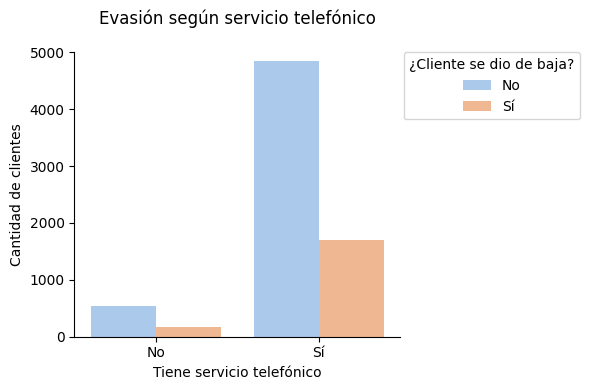

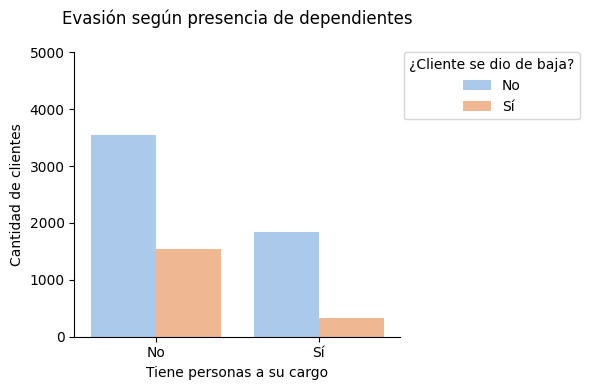

In [22]:
graficar_churn_categoricas(df)

# <strong><font color="3f51b5">📌 Informe final</font></strong>

## 🔹 Introducción

El presente informe corresponde al desarrollo del desafío **Telecom X - Evasión de Clientes**, cuyo objetivo fue analizar el comportamiento de los usuarios de una empresa de telecomunicaciones para identificar patrones relacionados con la **cancelación de servicios (Churn)**.

La empresa enfrenta un alto índice de deserción y necesita comprender qué factores están más asociados a esta pérdida de clientes para implementar acciones de retención más efectivas.

---

## 🔹 Limpieza y Tratamiento de Datos

Durante el proceso de limpieza se realizaron los siguientes pasos:

- Extracción de los datos desde una API (formato JSON).
- Normalización de columnas anidadas (`customer`, `internet`, `phone`, `account`).
- Conversión de valores categóricos binarios (`Yes/No`, `No internet service`, etc.) a formato numérico (`1/0`).
- Traducción de variables clave a español para facilitar la interpretación.
- Unificación de valores nulos o inconsistentes.
- Verificación de duplicados y control de registros faltantes.

---

## 🔹 Análisis Exploratorio de Datos (EDA)

Se realizó un análisis detallado mediante visualizaciones para detectar posibles causas de evasión:

- Distribución general del Churn
- Análisis por tipo de contrato, método de pago, tipo de internet
- Asociación entre presencia de dependientes, servicios telefónicos y la evasión

Estas visualizaciones se encuentran documentadas en secciones anteriores del notebook, respaldadas por gráficos de barras comparativos.

---

## 🔹 Conclusiones e Insights

- La **evasión es significativamente más alta** en contratos **"Mes a Mes"**.
- Clientes que **utilizan cheque electrónico** como medio de pago tienen mayor tendencia a cancelar.
- Usuarios con **Fibra Óptica** muestran mayor índice de deserción que los de DSL o sin Internet.
- Aquellos **sin dependientes** o **sin servicio telefónico** presentan tasas más elevadas de cancelación.

Estos patrones son consistentes con perfiles de clientes menos comprometidos o con menor integración de servicios.

---

## 🔹 Recomendaciones

1. **Fomentar contratos anuales o bianuales**, ofreciendo descuentos o beneficios exclusivos.
2. **Promover el uso de medios de pago automáticos**, como tarjeta de crédito o débito automático.
3. **Monitorear clientes con servicios de Fibra Óptica**, evaluando su satisfacción con la calidad del servicio.
4. **Ofrecer bundles (paquetes combinados)** que incluyan internet, TV y teléfono para aumentar la fidelización.
5. **Campañas específicas para clientes sin dependientes o con bajo nivel de servicios contratados**.

---

Este análisis puede servir como base para una futura **implementación de modelos predictivos de Churn**, permitiendo identificar clientes en riesgo y tomar acciones preventivas con anticipación.

# Task

El objetivo del desafío fue abordar el problema de **evasión de clientes (Churn)** en la empresa ficticia Telecom X. El reto consistía en analizar un conjunto de datos entregado en formato JSON anidado a través de una API, identificar patrones de cancelación de servicios, y proponer soluciones estratégicas basadas en análisis exploratorio.

Para lograrlo, fue necesario transformar y preparar adecuadamente los datos para su análisis posterior, incluyendo una etapa de **normalización de columnas anidadas** que impedían el acceso directo a variables clave.


## Flatten columnas anidadas

El archivo JSON proporcionado contenía múltiples niveles de anidación, especialmente en las claves `customer`, `account`, `internet`, y `phone`. Estas estructuras dificultaban la manipulación directa con Pandas.

Para resolverlo, se aplicó un proceso de "aplanado" (flattening) que permitió convertir cada subestructura en columnas planas dentro del `DataFrame`, facilitando así su análisis.

Este proceso implicó:

- Utilizar `pd.json_normalize()` para extraer los datos internos.
- Realizar `merge` con el `DataFrame` principal, unificando los datos por `customerID`.


### Subtask:

Extraer correctamente los datos de los diccionarios anidados (`customer`, `phone`, `internet`, `account`) y convertirlos en columnas independientes, asegurando que toda la información esté disponible en un único `DataFrame` plano.

Este subpaso fue esencial para garantizar que las siguientes etapas del pipeline (limpieza, análisis, visualización) se pudieran realizar sin errores técnicos.
